## Ramon Brand - Session 4 - NMist with fashion images and Convolution
### Overview
The idea of this exercise is to train a neural network using the fashion data set. It includes 60,000 images of training data and 10,000 images of test data. However, this time, we will use convolution layers to change our data from pixel elements to filtered characteristic elements.

### Part 1 - Our baseline model
First we create a nice clean model without convolution and analyze it.

In [10]:
import numpy as np
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import mnist_reader
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# -- Load image
x_train, y_train = mnist_reader.load_mnist('', kind='train')
x_test, y_test = mnist_reader.load_mnist('', kind='t10k')

# -- Change type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# -- Normalize
x_train /= 255
x_test /= 255

# -- Change results to category one hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# -- Extract some validation data from our training data
VALIDATION_SAMPLES = 10000

x_val = x_train[len(x_train) - VALIDATION_SAMPLES:]
x_train = x_train[:len(x_train) - VALIDATION_SAMPLES]
y_val = y_train[len(y_train) - VALIDATION_SAMPLES:]
y_train = y_train[:len(y_train) - VALIDATION_SAMPLES]

# -- Create model
model = Sequential()
model.add(Dense(50, input_shape=(28 * 28,), activation="relu"))
model.add(Dense(25, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

hist = model.fit(x_train, y_train, epochs=50, batch_size=256, validation_data=(x_val,y_val))

score = model.evaluate(x_test, y_test)
print("Loss: ", score[0])
print("Accuracy: ", score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_8 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                260       
Total params: 40,785
Trainable params: 40,785
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.7029 - acc: 0.4247 - val_loss: 1.1643 - val_acc: 0.6462
Epoch 2/50
50000/50000 [==============================] - 1s 19us/step - loss: 0.9641 - acc: 0.6903 - val_loss: 0.8331 - val_acc: 0.7253
Epoch 3/50
50000/50000 [==============================] - 1s 19us/step - loss:

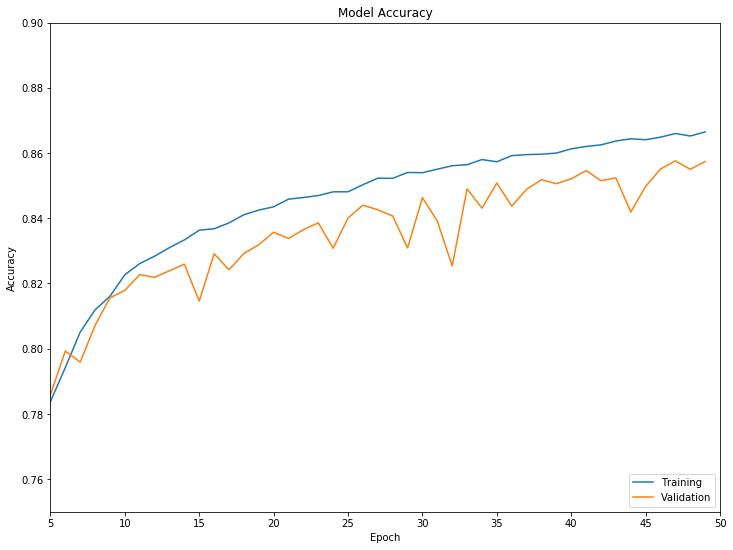

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.xlim([5,50])
plt.ylim([0.75,0.9])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"], loc="lower right")
plt.show()

We have got a model which is slightly underfitting, which can be seen by the validation accuracy still improving, and not yet diverging from the training accuracy. This is good for this test, since we can now add convolution layers and see if we can increase the accuracy.

### Part 2 - Adding Convolution Layers

In [40]:
import numpy as np
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import mnist_reader
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.utils import to_categorical

# -- Load image
x_train, y_train = mnist_reader.load_mnist('', kind='train')
x_test, y_test = mnist_reader.load_mnist('', kind='t10k')

# -- Change type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# -- Normalize
x_train /= 255
x_test /= 255

# -- Change input to 28 , 28
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

# -- Change results to category one hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# -- Extract some validation data from our training data
VALIDATION_SAMPLES = 10000

x_val = x_train[len(x_train) - VALIDATION_SAMPLES:]
x_train = x_train[:len(x_train) - VALIDATION_SAMPLES]
y_val = y_train[len(y_train) - VALIDATION_SAMPLES:]
y_train = y_train[:len(y_train) - VALIDATION_SAMPLES]

# -- Create model
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(50, activation="relu"))
model.add(Dense(25, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

hist2 = model.fit(x_train, y_train, epochs=50, batch_size=256, validation_data=(x_val,y_val))

score2 = model.evaluate(x_test, y_test)
print("Loss: ", score2[0])
print("Accuracy: ", score2[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 50)                270450    
_________________________________________________________________
dense_35 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_36 (Dense)             (None, 10)                260       
Total params: 272,065
Trainable params: 272,065
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 84us/step - loss: 2.1160 

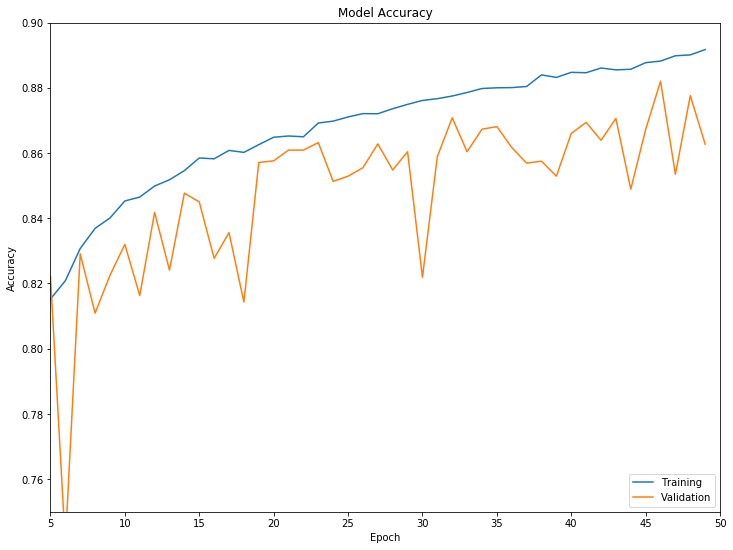

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.plot(hist2.history["acc"])
plt.plot(hist2.history['val_acc'])
plt.xlim([5,50])
plt.ylim([0.75,0.9])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"], loc="lower right")
plt.show()

We added one layer with 8 filters, each with kernel size of 3x3. The validation accuracy did indeed go up a bit, which is promissing, since a single convolution layer with only 8 filters is minimal.

Something to note here is that the validation accuracy seems to be significantly more noisy, maybe more epochs and a smaller sample size would help, otherwise the only option is to introduce k-fold validation, however the sample size is not too small, so the noisiness is rather strange.

### Part 2 - Test Model
Lets try with more layers.

In [42]:
import numpy as np
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import mnist_reader
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.utils import to_categorical

# -- Load image
x_train, y_train = mnist_reader.load_mnist('', kind='train')
x_test, y_test = mnist_reader.load_mnist('', kind='t10k')

# -- Change type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# -- Normalize
x_train /= 255
x_test /= 255

# -- Change input to 28 , 28
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

# -- Change results to category one hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# -- Extract some validation data from our training data
VALIDATION_SAMPLES = 10000

x_val = x_train[len(x_train) - VALIDATION_SAMPLES:]
x_train = x_train[:len(x_train) - VALIDATION_SAMPLES]
y_val = y_train[len(y_train) - VALIDATION_SAMPLES:]
y_train = y_train[:len(y_train) - VALIDATION_SAMPLES]

# -- Create model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(5, 5), activation="relu"))
model.add(Conv2D(128, kernel_size=(7, 7), activation="relu"))
model.add(Flatten())
model.add(Dense(50, activation="relu"))
model.add(Dense(25, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

hist3 = model.fit(x_train, y_train, epochs=50, batch_size=256, validation_data=(x_val,y_val))

score3 = model.evaluate(x_test, y_test)
print("Loss: ", score3[0])
print("Accuracy: ", score3[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 64)        51264     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 128)       401536    
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_37 (Dense)             (None, 50)                1638450   
_________________________________________________________________
dense_38 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_39 (Dense)             (None, 10)                260       
Total para

10000/10000 [==============================] - 3s 255us/step
Loss:  0.34988847024440767
Accuracy:  0.879


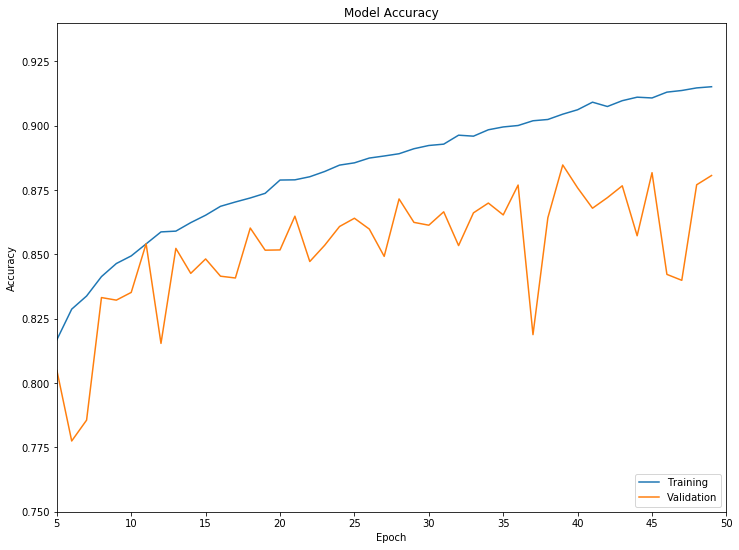

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.plot(hist3.history["acc"])
plt.plot(hist3.history['val_acc'])
plt.xlim([5,50])
plt.ylim([0.75,0.94])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"], loc="lower right")
plt.show()

We managed to squeeze another 2 percentage points from the network by increasing the convolution layer count and the number of filters, however we can now start seeing some overfitting taking place as the validation accuracy is diverging from the training accuracy.

This model took about 20 minutes to train, but most likely, with additional dense layers and more dense layer neurons, with added dropout layers to minimize overfitting, the model could possibly get another percentage point or so of accuracy above the 0.88 we have now.

### Part 3 - Assignment Model

In [51]:
import numpy as np
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import mnist_reader
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.utils import to_categorical

# -- Load image
x_train, y_train = mnist_reader.load_mnist('', kind='train')
x_test, y_test = mnist_reader.load_mnist('', kind='t10k')

# -- Change type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# -- Normalize
x_train /= 255
x_test /= 255

# -- Change input to 28 , 28
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

# -- Change results to category one hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# -- Extract some validation data from our training data
VALIDATION_SAMPLES = 10000

x_val = x_train[len(x_train) - VALIDATION_SAMPLES:]
x_train = x_train[:len(x_train) - VALIDATION_SAMPLES]
y_val = y_train[len(y_train) - VALIDATION_SAMPLES:]
y_train = y_train[:len(y_train) - VALIDATION_SAMPLES]

# -- Create model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(256, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(80, activation="relu"))
model.add(Dense(40, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

hist4 = model.fit(x_train, y_train, epochs=50, batch_size=256, validation_data=(x_val,y_val))

score4 = model.evaluate(x_test, y_test)
print("Loss: ", score4[0])
print("Accuracy: ", score4[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4096)              0         
__________

50000/50000 [==============================] - 13s 265us/step - loss: 0.2893 - acc: 0.8932 - val_loss: 0.3966 - val_acc: 0.8534
Epoch 48/50
50000/50000 [==============================] - 13s 265us/step - loss: 0.2847 - acc: 0.8960 - val_loss: 0.3407 - val_acc: 0.8766
Epoch 49/50
50000/50000 [==============================] - 13s 265us/step - loss: 0.2859 - acc: 0.8949 - val_loss: 0.3866 - val_acc: 0.8607
Epoch 50/50
10000/10000 [==============================] - 2s 160us/step
Loss:  0.3560066689372063
Accuracy:  0.8745


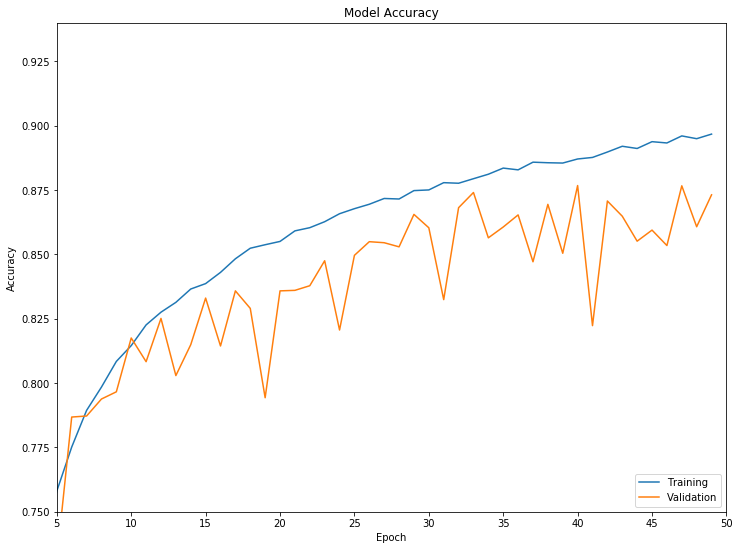

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.plot(hist4.history["acc"])
plt.plot(hist4.history['val_acc'])
plt.xlim([5,50])
plt.ylim([0.75,0.94])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"], loc="lower right")
plt.show()

This model is as the assignment suggested, with adding some pooling layers. The accuracy is slightly down to 0.875 from 0.88, but it does seem that there is less overfitting, and the validation accuracy is still improving, meaning with more epochs, the accuracy could still go up.